# **Classifying movie reviews: A binary classification**

The IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned
into sequences of integers, where each integer stands for a specific word in a dictionary.

The goal of the project is to classify movie reviews as positive or negative, based on the text content of the reviews

**The IMDB Dataset**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# num_words=10000 - keep the top 10,000 most frequently occurring words in the training data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
 # The data contains the array of lists of processing data

# train_data
# train_data[0]
train_data.shape, train_labels.shape, train_data[0][:10], train_labels[:10]

((25000,),
 (25000,),
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65],
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0]))

In [6]:
# verify the number of word

max([max(num_word) for num_word in train_data])

9999

**Decoding reviews back to text**

In [7]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# Reverses mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Decodes the review.
# The indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)

**Decoded_review code explanation**
* The ***i-3*** part of the code is used to get the reverse index of the word at the current position i in the train_data list
* If the key ***i-3*** does not exist in the dictionary, it returns the default value **"?"**.

**[reverse_word_index.get(i-3, "?") for i in train_data[0]]**

The reserved indices **0**, **1**, and **2** in the context of natural language processing have specific meanings and uses. They are not related to the search results provided, which are unrelated to the topic of reserved indices in NLP.

In the context of natural language processing, the reserved indices 0, 1, and 2
are used for special purposes:

* **0**: This index is reserved for "padding." Padding is a technique used to ensure that the input data has a consistent length, which is necessary for some machine learning algorithms. In the context of word indices, padding is used to fill the input sequence with a special word or token that does not have any meaning in the text, but it helps maintain the structure of the input data.

* **1**: This index is reserved for "start of sequence." In some NLP tasks, it is necessary to indicate the beginning of a sequence of words. The index 1 is used to represent the start of the sequence, allowing the model to recognize the beginning of the input text.

* **2**: This index is reserved for "unknown." In some cases, the model may encounter words or tokens that are not in its vocabulary.
The index 2 is used to represent these unknown words, allowing the model to handle them appropriately, such as by ignoring them or replacing them with a default token.

These reserved indices are used to ensure that the model can process the input data correctly and handle special cases, such as the beginning of a sequence or unknown words.

In [8]:
# check the item in word_idex dict

{k:v for (k, v) in word_index.items() if v < 11 }

{'i': 10,
 'it': 9,
 'is': 6,
 'in': 8,
 'of': 4,
 'a': 3,
 'br': 7,
 'the': 1,
 'and': 2,
 'to': 5}

In [9]:
# The i-3 part of the code is used to get the reverse index of the word at the current position i in the train_data list
# If the not found, replace with "?"

[reverse_word_index.get(i-3, "?") for i in train_data[0][:10]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story']

In [10]:
# check the reverse_word_idex

{v: k for (v, k) in reverse_word_index.items() if v < 11 }

{10: 'i',
 9: 'it',
 6: 'is',
 8: 'in',
 4: 'of',
 3: 'a',
 7: 'br',
 1: 'the',
 2: 'and',
 5: 'to'}

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Preparing the Data**

A neural network expects to process contiguous batches of data. So, we have to turn the lists into tensors.

In [12]:
# Encoding the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):

  # creates an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      # sets specific indices of results[i] to 1s
      results[i, j] = 1.
    return results

In [13]:
# Vectorized training data and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train.shape, x_train[0]

((25000, 10000), array([0., 1., 1., ..., 0., 0., 0.]))

In [15]:
# Vectorize label data with numpy which is more straightforward

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Building model**

Build model with the following architecure:


*   Two intermediate layers with 16 units each (A Dense layer with 16 output units)
*   A third layer that will output the scalar prediction regarding the sentiment of the current review



* A relu (rectified linear unit) is a function meant to zero out negative values
* A sigmoid “squashes” arbitrary values into the [0, 1] interval

In [17]:
# Model definition
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

**Crossentropy** is a quantity from the field of information theory that **measures the distance between probability distribution**s or, in this case, **between the ground-truth distribution and predictions**.

In [18]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Validating approach**

In [19]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((10000, 10000), (15000, 10000), (10000,), (15000,))

Train the model for 20 epochs (20 iterations over all samples in the training data) in mini-batches of 512 samples.

Monitor loss and accuracy on the 10,000 samples that we set apart by passing the validation data as the *validation_dat*a argument.

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 76ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.4948
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

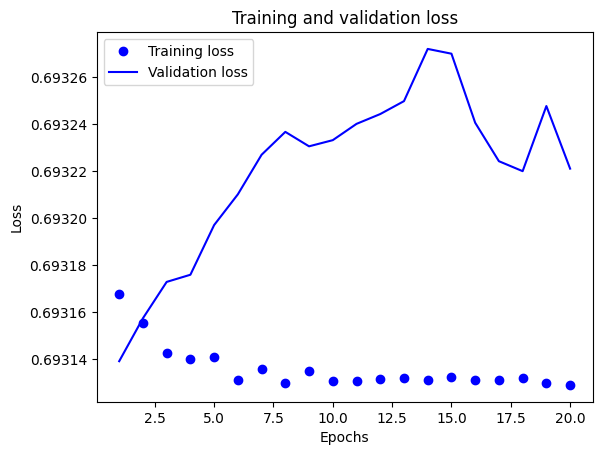

In [23]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

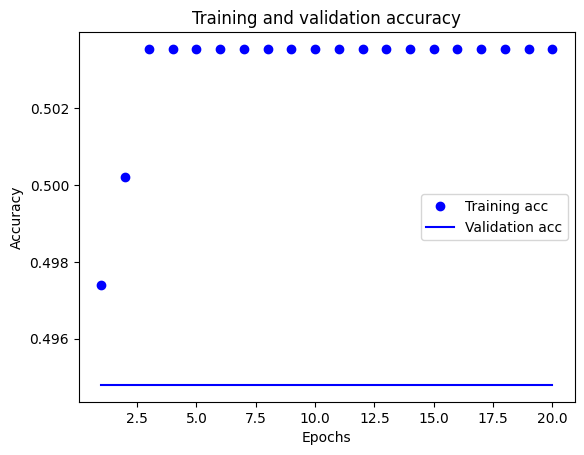

In [24]:
# Plotting the training and validation accuracy

plt.clf() # Clears the figure
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [25]:
# Model definition
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [26]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
# train a new model from scratch for four epochs and then evaluate it on the test data

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.6932 - accuracy: 0.5029
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 4/4
49/49 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.4925


In [28]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5000


In [29]:
# The first number, 0.69, is the test loss, and the second number, 0.49, is the test accuracy

results

[0.693149983882904, 0.4999600052833557]

**Using a trained model to generate predictions on new data**

In [30]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.53117406],
       [0.49910396],
       [0.49910396],
       ...,
       [0.49910396],
       [0.49910396],
       [0.49910396]], dtype=float32)

**Improving model with further experiments**

In [31]:
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [33]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 8s 118ms/step - loss: 0.2501 - accuracy: 0.5062 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/20
49/49 [==============================] - 2s 49ms/step - loss: 0.2502 - accuracy: 0.4976 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 3/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2501 - accuracy: 0.4989 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2501 - accuracy: 0.4945 - val_loss: 0.2503 - val_accuracy: 0.5000
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2500 - accuracy: 0.5060 - val_loss: 0.2505 - val_accuracy: 0.5000
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2501 - accuracy: 0.5014 - val_loss: 0.2501 - val_accuracy: 0.5000
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2501 - accuracy: 0.4968 - val_loss: 0.2501 - val_accuracy: 0.5000
Epoch 8/20
4

In [38]:
predict_model = model.predict(x_test)
predict_model

782/782 [==============================] - 2s 2ms/step


array([[0.5143348 ],
       [0.49874264],
       [0.49874264],
       ...,
       [0.49874264],
       [0.49874264],
       [0.49874264]], dtype=float32)

In [39]:
# The first number, 0.25, is the test loss, and the second number, 0.49, is the test accuracy

results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.2500 - accuracy: 0.5000


[0.2500024437904358, 0.4999600052833557]

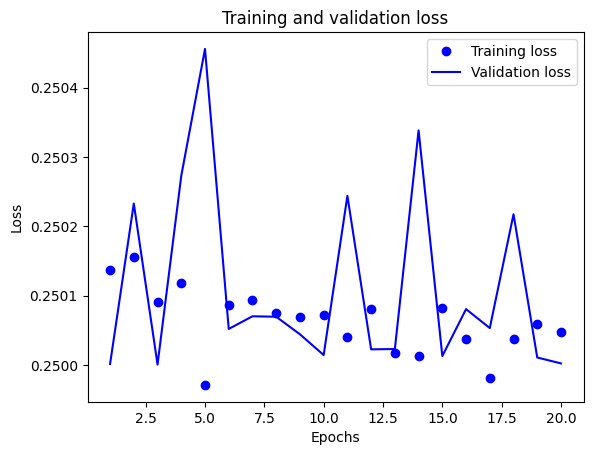

In [35]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # "b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

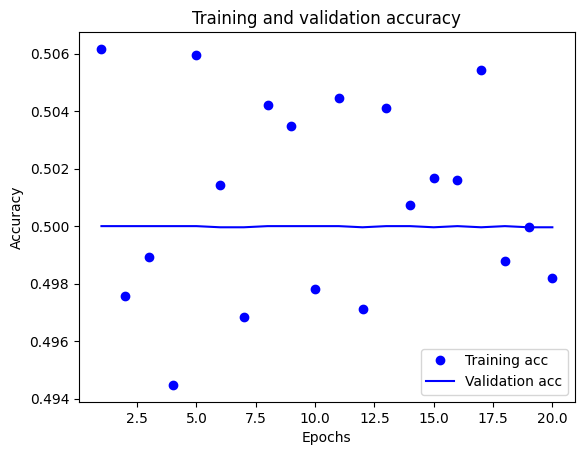

In [36]:
# Plotting the training and validation accuracy

plt.clf() # Clears the figure
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
new =  model.predict(x_test)
new

782/782 [==============================] - 2s 2ms/step


array([[0.5143348 ],
       [0.49874264],
       [0.49874264],
       ...,
       [0.49874264],
       [0.49874264],
       [0.49874264]], dtype=float32)

In [40]:
# The first number, 0.25, is the test loss, and the second number, 0.49, is the test accuracy

new_result = model.evaluate(x_test, y_test)
new_result

782/782 [==============================] - 2s 3ms/step - loss: 0.2500 - accuracy: 0.5000


[0.2500024437904358, 0.4999600052833557]